## Live coding: Edge detection, perspective transform and Morphological transformations
  


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
def imshow(img):
    if enlarge:
        plt.figure(figsize=(20,15));
    plt.imshow(img[:,:,::-1])
    #lt.figure(figsize=(15,15))
    #plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [47]:
def imshow(img):
    #if enlarge:
       # plt.figure(figsize=(20,15));
   # plt.imshow(img[:,:,::-1])
    plt.figure(figsize=(15,15))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [61]:
notes = cv2.imread('./img/t2.png')
newspaper=cv2.imread('.img/text.png')
coins =cv2.imread('.img/coins3.jpg')
dog=cv2.imread('img/custom.jpg')
t1=cv2.imread('img/t1.png')


In [11]:
# making smaller
dog_copy =dog.copy()
for i in range(5):
    dog_copy = cv2.pyrDown(dog_copy)#5 times rescaling down
    print(dog_copy.shape)

(333, 592, 3)
(167, 296, 3)
(84, 148, 3)
(42, 74, 3)
(21, 37, 3)


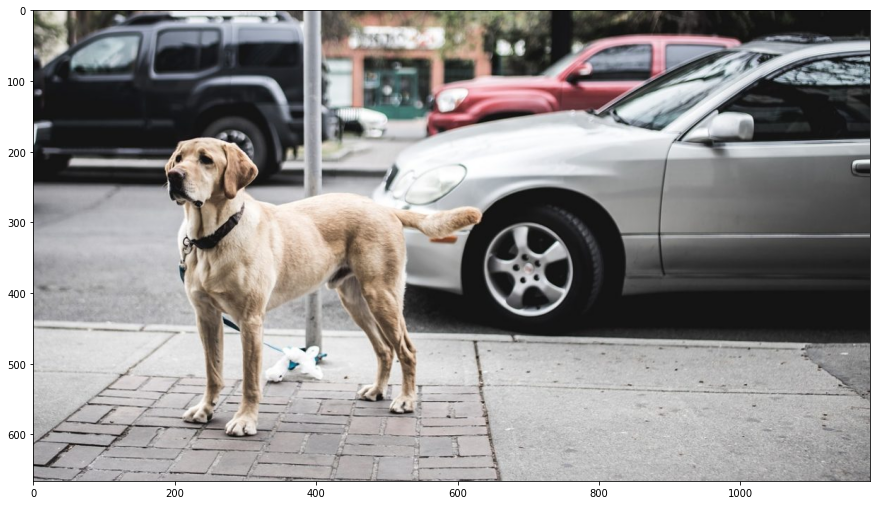

In [14]:
imshow(dog)

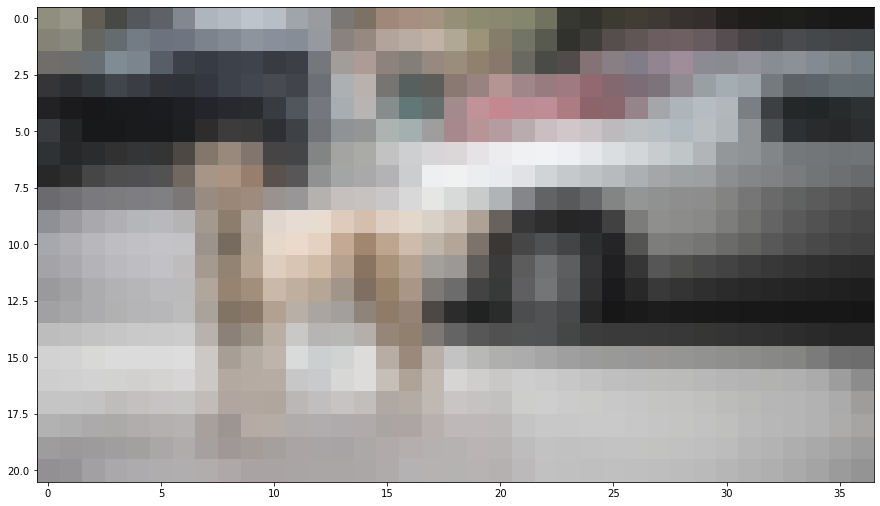

In [16]:
imshow(dog_copy)

In [18]:
# making bigger
dog_copy =dog.copy()
for i in range(2): #schaling up for 5 times
    dog_copy = cv2.pyrUp(dog_copy)#5 times rescaling down
    print(dog_copy.shape)

(1332, 2368, 3)
(2664, 4736, 3)
(5328, 9472, 3)
(10656, 18944, 3)
(21312, 37888, 3)


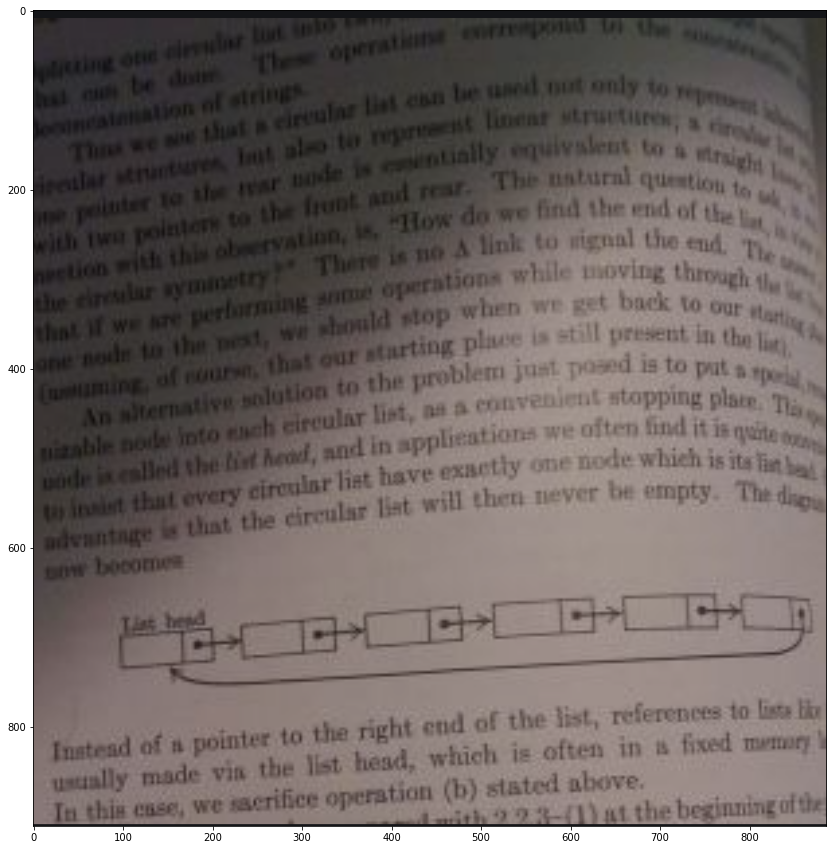

In [21]:
imshow(notes)

In [28]:
grayscale_note=cv2.cvtColor(notes, cv2.COLOR_BGR2GRAY)

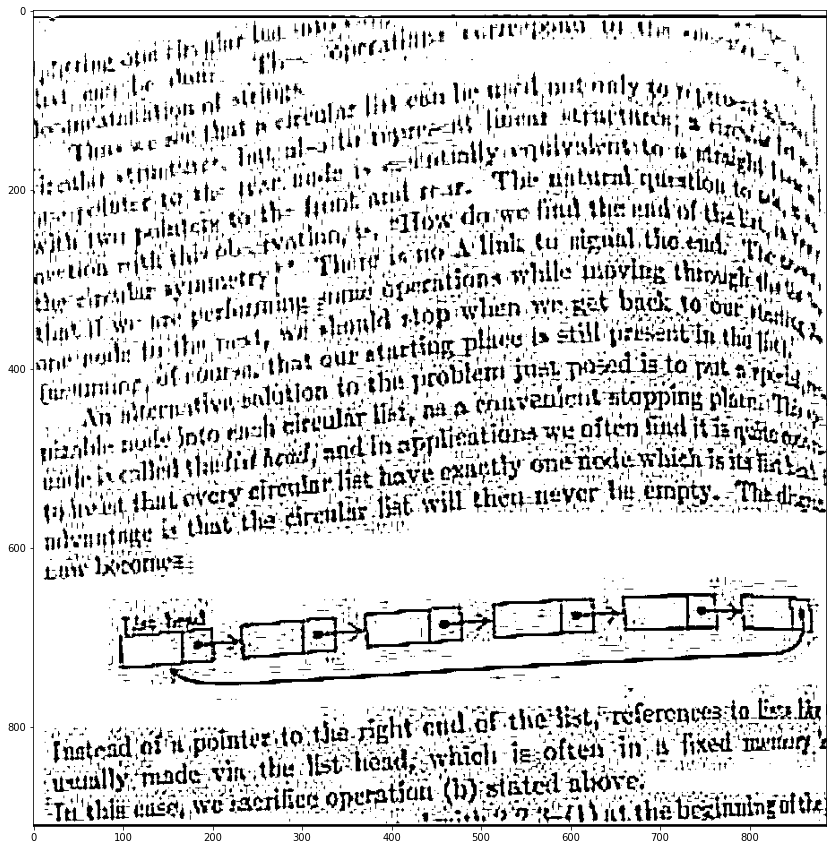

In [39]:
#Apaptive threshold
grayscale_note=cv2.cvtColor(notes, cv2.COLOR_BGR2GRAY)
thresh =cv2.adaptiveThreshold(grayscale_note,
                             255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv2.THRESH_BINARY,13,3)
plt.figure(figsize=(20,15))
plt.imshow(thresh,cmap='gray')

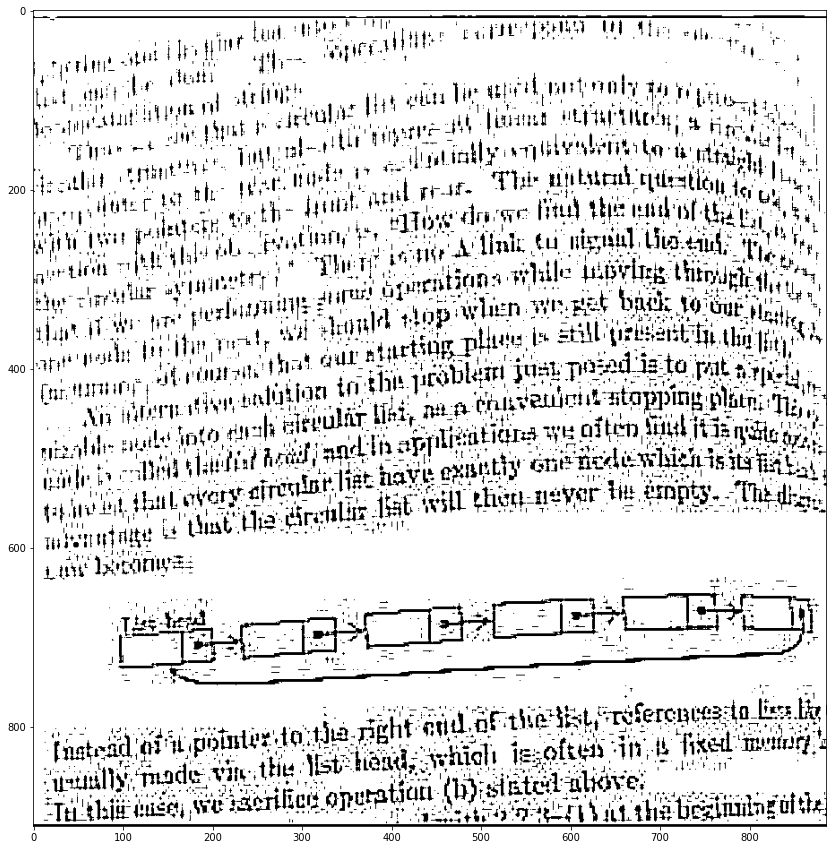

In [31]:
#Manual
grayscale_note=cv2.cvtColor(notes, cv2.COLOR_BGR2GRAY)
ret,threshs=cv2.threshold(grayscale_note,128,255,cv2.THRESH_BINARY)
plt.figure(figsize=(20,15))
plt.imshow(thresh,cmap='gray')

In [66]:
grayscale_news=cv2.cvtColor(t1,cv2.COLOR_BGR2GRAY)

ret,otsu=cv2.threshold(grayscale_news,0,255,cv2.THRESH_BINARY_INV
                      +cv2.THRESH_OTSU)

In [67]:
ret,th=cv2.threshold(grayscale_news,0,255,cv2.THRESH_BINARY_INV)
print(ret)

0.0


In [82]:
#white/black
grayscale_news=cv2.cvtColor(newspaper,cv2.COLOR_BAYER_BG2GRAY)
ret,otsu=cv2.threshold(grayscale_newsayscale_news,0,
                      255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(otsu,cmap='gray')

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-1hfhc_rd\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [76]:
kernel =np.ones((3,3), np.uint8)

In [77]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

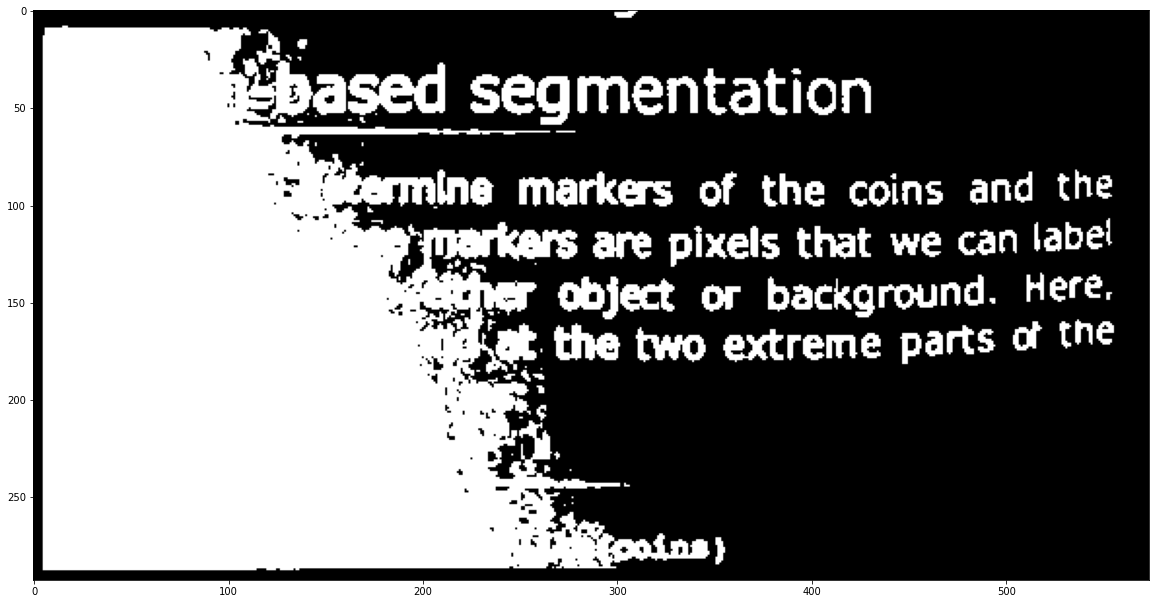

In [79]:
erosion=cv2.erode(otsu,kernel, iterations=4)
plt.figure(figsize=(20,15))
plt.imshow(otsu,cmap='gray')


<Figure size 1440x1080 with 0 Axes>

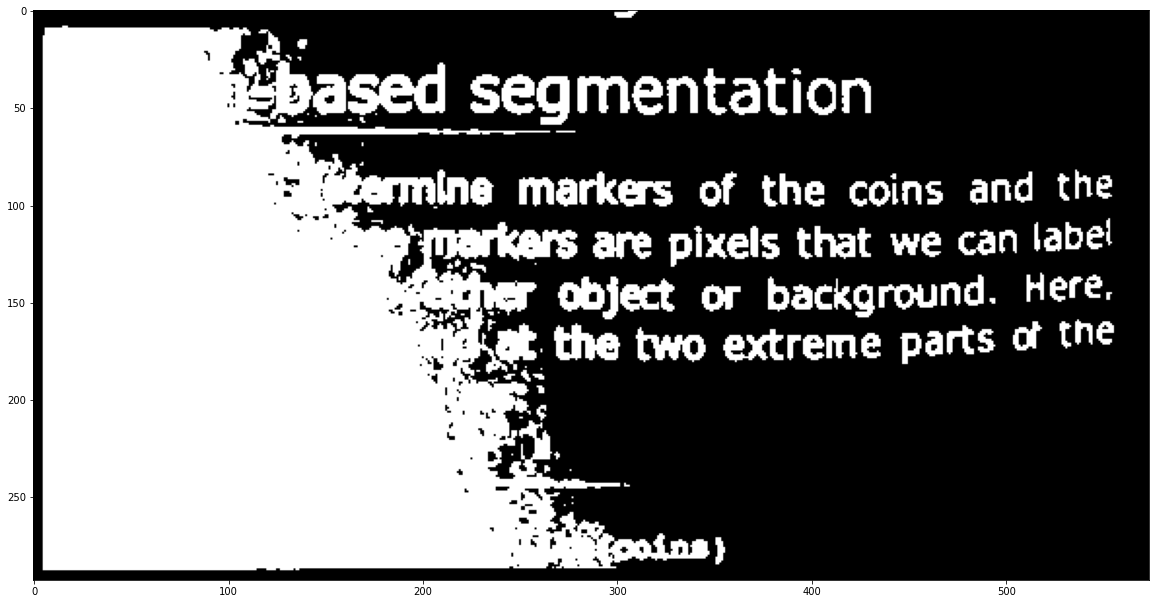

In [80]:
erosion=cv2.dilate(otsu,kernel, iterations=4)
plt.figure(figsize=(20,15))
plt.figure(figsize=(20,15))
plt.imshow(otsu,cmap='gray')

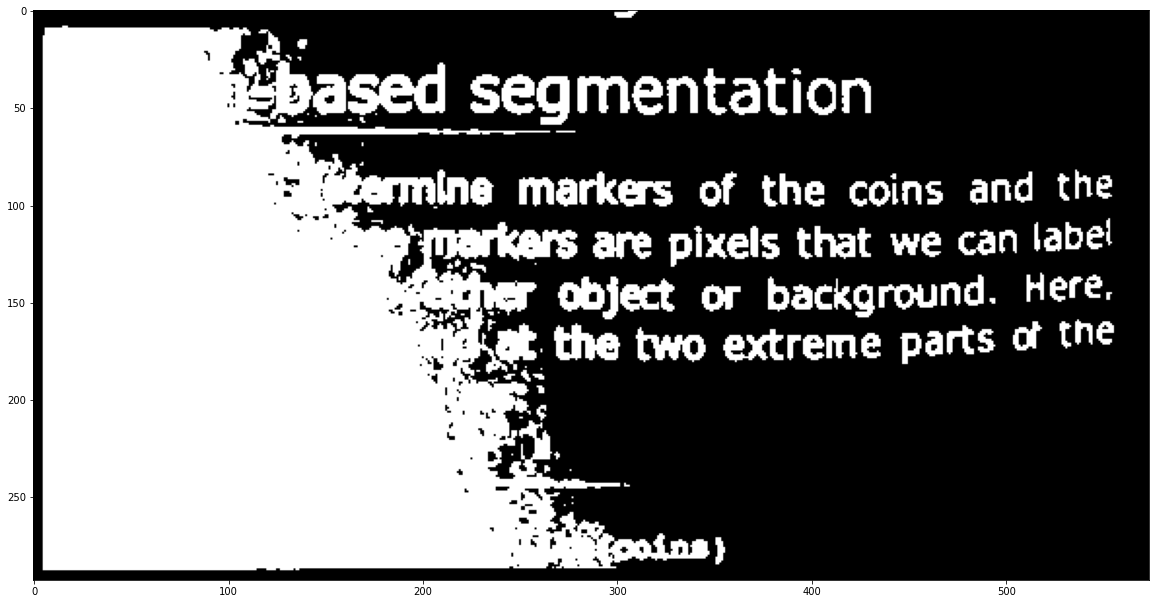

In [81]:
erosion=cv2.dilate(otsu,kernel, iterations=4)
plt.figure(figsize=(20,15))
plt.imshow(otsu,cmap='gray')

In [85]:
#setting up the Kernels
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kernel

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

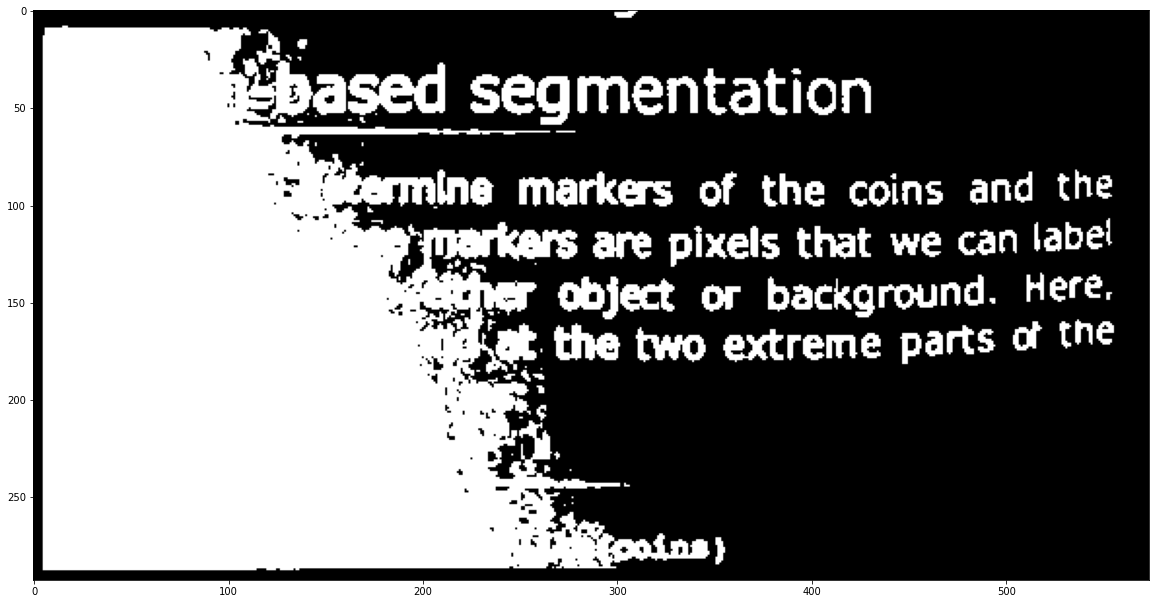

In [89]:
#Opening
opening=cv2.morphologyEx(otsu,cv2.MORPH_OPEN,kernel)
plt.figure(figsize=(20,15))
plt.imshow(otsu,cmap='gray')

In [107]:
new_image=cv2.imread('img/scan.jpg')

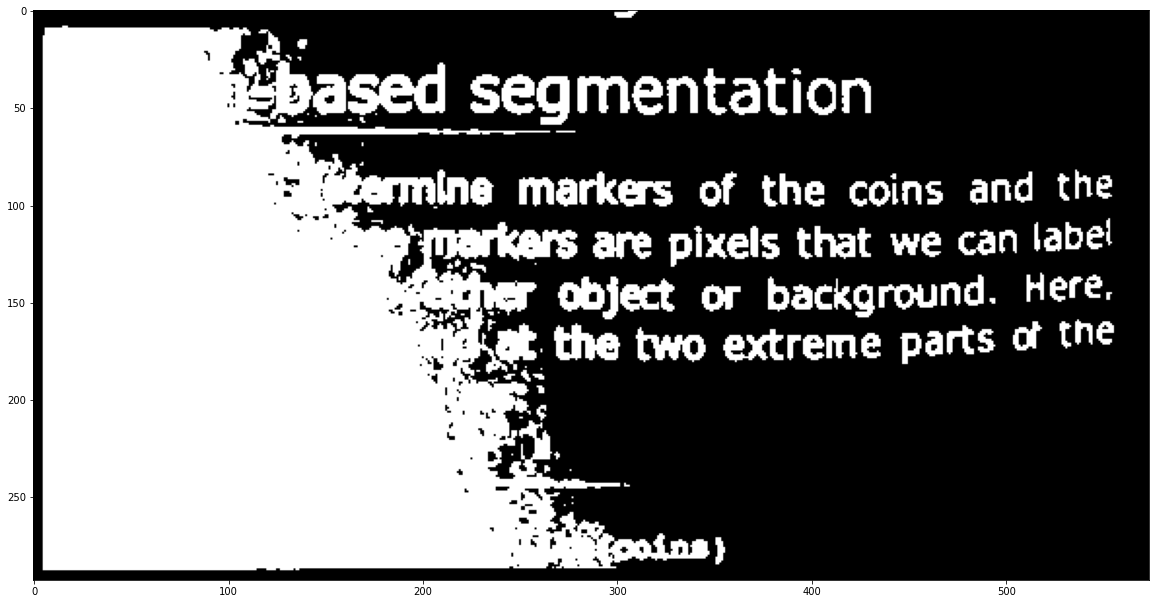

In [106]:
#Opening
opening=cv2.morphologyEx(otsu,cv2.MORPH_OPEN,kernel)
plt.figure(figsize=(20,15))
plt.imshow(otsu,cmap='gray')

In [108]:
# movements of the picture
original_vertices = np.float32([[320,15],[700,215],
                              [85,610],[530,780]])
destination_vertices = np.float32([[0,0], [420,0],
                                  [0,594], [420,594]])

M = cv2.getPerspectiveTransform(original_vertices, 
                               destination_vertices)
M

array([[ 7.76546388e-01,  3.06703195e-01, -2.53095392e+02],
       [-4.52324268e-01,  8.59416109e-01,  1.31852524e+02],
       [-2.46841082e-04,  9.96627311e-05,  1.00000000e+00]])

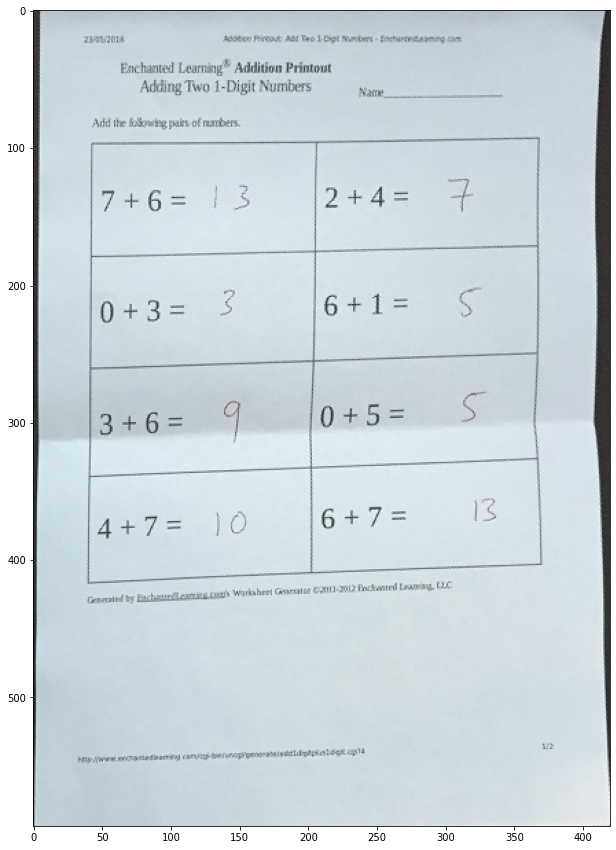

In [109]:
new_image=cv2.warpPerspective(new_image,M,(420,594))
plt.figure(figsize=(20,15))
plt.imshow(new_image,cmap='gray')